# Summer School - Modeling Water Fluxes In The Soil-Plant System

## Simulating the growing root architecture and trait analysis

How to 

1. Simulate a root system and a full plant

2. Understanding model parameters 

3. Basic root system traits and their dynamics

4. Depth profiles

### 0. Loading libraries

In [ ]:
# generic Python libraries
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG, Image, display # to show svg files in the notebook

## for old CPB
# specific CPlantBox libraries
# search_path = '../lib'
# sys.path.append(search_path)
# import visualisation.vtk_plot as vp # for quick vizualisations

## for new CPB
import plantbox as pb #CPlantBox itself
import plantbox.visualisation.vtk_plot as vp # for quick vizualisations

### 1. Simulate a root system and a plant
The code below shows how to load a parameter file, simulate the plant growth, save and visualize the results. \

In [ ]:
# Create instance describing a root system
rs = pb.MappedPlant()

# Open plant and root parameter from a file
path =  "../../../modelparameter/structural/rootsystem/"
# other parameter file names for root systems:
# Anagallis_femina_Leitner_2010, Zeamays_synMRI, wheat_synMRI , Lupinus_albus_Leitner_2014
name = "wheat_synMRI"
rs.readParameters(path + name + ".xml")

# Simulate
rs.initialize() 
rs.simulate(30) # [days] Carefull, do not put a too high number!
print('current plant age is',rs.getSimTime(),'d')

# Visualize (e.g. "type","subType", "radius", "creationTime")
print('creating an image')
_  = vp.plot_roots(rs, "subType", interactiveImage = False) # Plot, using vtk. This function can take some time for large plants.
# _  = vp.plot_plant(rs, "subType", interactiveImage = False) # if potting a plant

**Q: simulate growth for 10 days.**\
**Q: Try to load different parameter files and look at the results. In the function 'plot_plant' change the variable that is used to color the root segments.**\
**Q: Go in the "./modelparameter/structural/rootsystem/" folder. Select a parameter file not listed in the code above to simulate.**\
**Q: Go in the "./modelparameter/structural/plant/" folder. Update the parameter** path. **Select a parameter file to simulate.**

**Careful! The function below is capricious!** \
If run too many times, it can hang or kill the kernel. It is not a problem if it happens. 
Simpy re-run the first cell of the notebook and go back to where you were.

In [ ]:
_ = vp.plot_roots(rs, "age", save_as = './results/plot_plant' , interactiveImage = True) 

**Q: Using the code above, try turning the root system and zoom-in. Save an image by clicking on the letter 'g'. Find and open the saved image.**

In [ ]:
rs.simulate(2) # [days]
print('current plant age is',rs.getSimTime(),'d')

In [ ]:
rs.initialize() 
rs.simulate(2) # [days]
print('current plant age is',rs.getSimTime(),'d')

**Q: Looking at the code snippets above, what is the purpose of the initialize function?**

**Q: fill-out the code below, to simulate the growth of a Maiz rootsystem for 5 days, with a time step of 12hrs. Plot the root system, the colors of the roots should give their radius.**\
Hint: replace the _____ with code

In [ ]:
dt = # define time step
simtime = # define the maximum simlation time
N = # define the number of time steps
path = # set the path to the parameter file
name = # set the name of the parameter file

plant = # create a plant object #
plant.readParameters(path + name + ".xml")

_____ # one function is missing here #
current_sim_time = 0.
for i in range(N):
    print('current simulation time is',current_sim_time)
    _____ # make plant grow
    current_sim_time += dt

print('current plant age is',plant.getSimTime(),'d') #should be equal to simtime

# plot the root system.
_ = vp.plot_roots(plant, _____ , save_as = './results/plot_plant' , interactiveImage = False) 

Once completed, the code above allows us save and exchange data to and from CPlantBox at specific time points. This will be used later in the notebook.

**Q: fix the code below to not get an error. Why was the fix necessary?**

In [ ]:
rs = MappedPlant()

## 2. Understanding parameters
### 2.1. Understanding root parameters
#### 2.1.1 Types and subtypes

**In the code below, make the plantbox library print the type number corresponding to the stem, root and leaf type and replace the _____ with numbers in the sentence below.**\
One basic parameters is "type", it defines if the organ is a seed (type = 1), stem (type = _____), root (type = _____), leaf (type = _____), or undefined (type = 0): 

In [ ]:
print("the id of the organ type",pb.seed,"is",int(pb.seed))
print("the id of the organ type",pb.stem,"is",int(pb.stem))
print("the id of the organ type",        "is"            )


For root parameters subType 1 is always the tap root. SubType 2 and subType 3 refer to first and second order laterals. The occurance of basal or shootborne roots is defined within the seed parameters, and then are referred to as subType 4 , and subType 5. 

Several structural parameters are similar between the organs. We will take the root as an example to understand those parameters. 
The image below gives an overview of some main parameters.

In [ ]:
display(SVG(filename='./figures/root_random_parameters.svg'))

The code below illustrate the effects of the parameters $l_b$, $l_a$, $l_n$, $l_{max}$, $a$ on the root of subtype 1., and how $theta$ affects the root of subtype 2.\
**Q: Try changing the value of those 6 parameters and look at the effect on the resulting root. Afterwards, in your own word, write below the meaning of those parameters.** \
An additional basic parameter is $r$, the growth rate (cm/day).\
**Q: Change the growth rate of the lateral roots to make them smaller.**

In [ ]:
rs = pb.MappedPlant()
path =  "./modelparameter/"
name = "one_root_and_lats"
rs.readParameters(path + name + ".xml")
random_parameters = rs.getOrganRandomParameter(pb.root)

random_parameters[1].lb = 0. # [cm]
random_parameters[1].ln = 1. # [cm]
random_parameters[1].la = 5 # [cm]
random_parameters[1].lmax = 30 # [cm] 
random_parameters[1].a = 0.1 # [cm] 

random_parameters[2].theta = 45. * np.pi/180. # [rad]. The first number is in degrees and  np.pi/180 convert it to radians 
random_parameters[2].r = 1.5 # [cm/day]

rs.initialize() 
rs.simulate(30) 
_  = vp.plot_roots(rs, "subType", interactiveImage = False) 

#### 2.1.2 Tropism
In the section below we will present the method to define root tropism. We will focuse on gravitropism but other options are available (e.g., plagiotropism).\
The change in direction of a root tip is calculated by randomly selecting $tropismN$ angles from a normal distribution with a mean of zero and standard deviation $tropismS$, and then selecting from these $tropismN$ angles the one that is closest to the desired direction defined by the parameter $tropismT$, i.e., for gravitropism, the direction closest to the vertical is selected. \
In other words, $tropismN$ is equivalent to the strength of the tropism and $tropismS$ to the flexibility of the root.\
The image below illustrate the effects of $tropismN$ and $tropismS$:

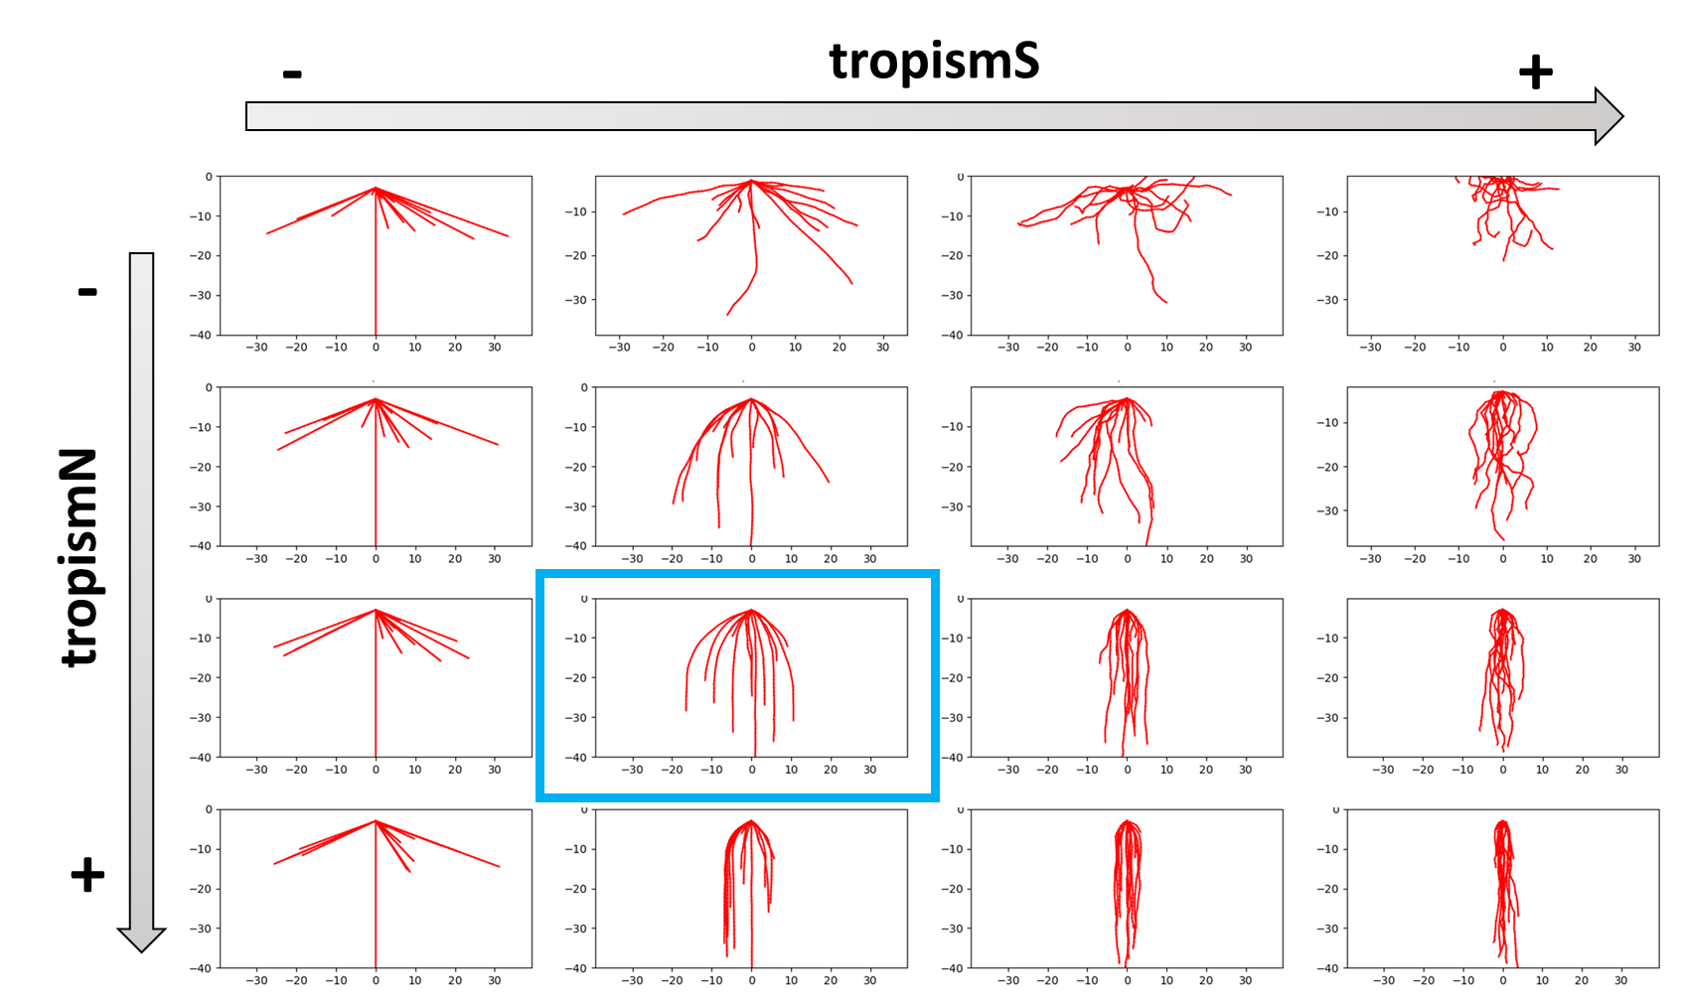

In [3]:
Image(filename='./figures/tropism.png')

In the image below, I have removed the exact value of  $tropismN$ and $tropismS$. \
**Q: Run the code below and change the values of $tropismN$ and $tropismS$ to recreate the subfigure that is in a blue square.**

In [ ]:
tropismN = 0  # strength of the tropism
tropismS = 0  # flexibility of the root [1/cm]  

rs = pb.MappedPlant()
path =  "./modelparameter/"
name = "tropism_test"
rs.readParameters(path + name + ".xml")
random_parameters = rs.getOrganRandomParameter(pb.root)

random_parameters[1].tropismN = tropismN
random_parameters[1].tropismS = tropismS

rs.initialize() 
rs.simulate(50) 

## create a 2D plot (do not worry about this now)
fig, ax = plt.subplots(1, 1)
nodes = rs.getNodes()  
segs = rs.getSegments()
for s in segs:
    n1, n2 = nodes[s.x], nodes[s.y] 
    ax.plot([n1.x, n2.x], [n1.z, n2.z], "r") 
ax.axis("equal")
ax.set_xlim([-30, 30.0])
ax.set_ylim([-40.0, 0.0])


#### 2.1.3 Successors (advanced)
It is possible to define any number of root type. Then, the user can decide which and how many organ of each type can grow out of a parent organ.

In [ ]:
plant = pb.MappedPlant()
######
p0 = pb.RootRandomParameter(plant) # create a default root parameter set
p1 = pb.RootRandomParameter(plant)  
p2 = pb.RootRandomParameter(plant) 
######

p0.name = "taproot" 
p0.a = 0.2  # radius (cm)
p0.subType = 1  # index starts at 1
p0.lb = 5  # basal zone (cm)
p0.la = 10  # apical zone (cm)
p0.lmax = 30  # maximal root length (cm)
p0.ln = 1.0  # inter-lateral distance (cm)
p0.theta = 0.0  # (rad)
p0.r = 1  # initial growth rate (cm day-1)
p1.dx = 1  # axial resolution (cm)
p0.tropismT = pb.TropismType.gravi  #
p0.tropismN = 1.8  # strength of tropism (1)
p0.tropismS = 0.2  # maximal bending (rad/cm) 
######
p0.successorST = [[2]]  # add successors subType
p0.successorOT = [[pb.root]]  # add successors organType
p0.successorP = [[1]]  #  probability that successor emerges
######


p1.name = "lateral1"  
p1.a = 0.1  # radius (cm)
p1.subType = 2  # index starts at 1
p1.lmax = 15  # maximal root length (cm)
p1.lmaxs = 0.15  # standard deviation of the maximal root length (cm) 
p0.ln = 1.0  # inter-lateral distance (cm)
p1.theta = 90.0 / 180.0 * np.pi  # (rad)
p1.r = 2  # initial growth rate (cm day-1)
p1.dx = 1  # axial resolution (cm)
p1.tropismT = pb.TropismType.gravi  #
p1.tropismN = 2  # strength of tropism (1)
p1.tropismS = 0.1  # maximal bending (rad cm-1) 
######
# p1.successorST = [[____]]  # add successors subType
# p1.successorOT =  [[pb.root]] # add successors organType
# p1.successorP = [[1]]   # probability that successor emerges
######


p2.name = "lateral2"  
p2.a = 0.1  # radius (cm)
p2.subType = 3  # index starts at 1
p2.lmax = 1  # maximal root length (cm)
p2.lmaxs = 0.15  # standard deviation of the maximal root length (cm) 
p2.theta = 90.0 / 180.0 * np.pi  # (rad)
p2.r = 2  # initial growth rate (cm day-1)
p2.dx = 1  # axial resolution (cm)
p2.tropismT = pb.TropismType.gravi  #
p2.tropismN = 2  # strength of tropism (1)
p2.tropismS = 0.1  # maximal bending (rad cm-1) 

#####
plant.setOrganRandomParameter(p0)  
plant.setOrganRandomParameter(p1)  
plant.setOrganRandomParameter(p2)  
#####

srp = pb.SeedRandomParameter(plant)  # with default values 
srp.seedPos = pb.Vector3d(0.0, 0.0, -3.0)  # seed position (cm)
plant.setOrganRandomParameter(srp) 

plant.initialize(False)

plant.simulate(50, False) 
vp.plot_roots(plant, "subType", interactiveImage = False)

The code above is quite long, but most of it is known: we define basic root parameters such as $l_{max}$ and $r$. The new sections are surrounded by # signes. As shown above it is possible to create a parameter set from scratch by calling RootRandomParameter(). After having changed the parameter values, the parameter sets are sent back to the plant via the function setOrganRandomParameter().

**Q: in the code above, uncomment the lines defining the successor of the root 'lateral1' so that the roots 'lateral2' grow out of them.**

#### 2.1.4 Other
It is possible to check the value of all the parameters of a subtype by using the print function. Not all will be presented during this course as some parameters are only usefull in very specific cases.

In [ ]:
print(random_parameters[1])

#### 2.1.4 The parameter files
From the beginning, we have used parameter files as basis before changing the parameters. It is possible to directly update those parameters in the file.\
NB: 'type' is a synonime of 'subtype' in CPlantBox.

In [ ]:
Image(filename='./figures/parameter_file.png')

**Q: in the file** one_root_and_lats **change the value of $l_b$, $l_a$, $l_n$, $l_{max}$, $a$ for the root of subtype 1., and $theta$ for the root of subtype 2 to recreate the changes you did via Python earlier.**

In [ ]:
rs = pb.MappedPlant()
path =  "./modelparameter/"
name = "one_root_and_lats"
rs.readParameters(path + name + ".xml")
random_parameters = rs.getOrganRandomParameter(pb.root)

rs.initialize() 
rs.simulate(30) 
_  = vp.plot_roots(rs, "subType", interactiveImage = False) 

Moreover, once you have defined your own parameters in Python, you can also save your new parameter set in an xml file:

In [ ]:
# change the parameter file via Python
rs = pb.MappedPlant()
path =  "./modelparameter/"
name = "one_root_and_lats"
rs.readParameters(path + name + ".xml")
random_parameters = rs.getOrganRandomParameter(pb.root)
print('old tropsimS is',random_parameters[1].tropismS )
print('old tropsimN is',random_parameters[1].tropismN )
random_parameters[1].tropismN = 0
random_parameters[1].tropismS = 1e6
rs.writeParameters("./results/modified_" + name + ".xml")

# use the parameter file via Python
rs = pb.MappedPlant()
rs.readParameters("./results/modified_" + name + ".xml")
random_parameters = rs.getOrganRandomParameter(pb.root)
print('new tropsimS is',random_parameters[1].tropismS )
print('new tropsimN is',random_parameters[1].tropismN )
rs.initialize() 
rs.simulate(30) 
_  = vp.plot_roots(rs, "subType", interactiveImage = False) 

### 2.2 Understanding stem parameters (intermediate)

TParameters of stems are almost identical to root parameters. Some advanced parameters of stem are no available for roots, but they are not needed for basic cases. \
The code below defines the growth of a stem.\
**Q: Using the root parameters that you know, change the structural parameters of the stem: lower the number of laterals and make the main stem stand completelly straight.**

In [ ]:
rs = pb.MappedPlant()
path =  "./modelparameter/"
name = "one_stem_and_branches"
rs.readParameters(path + name + ".xml")
random_parameters = rs.getOrganRandomParameter(pb.stem) # <= we change the input to getOrganRandomParameter, to get stem parameters

#____# change the random_parameters values

rs.initialize() 
rs.simulate(30) 
_  = vp.plot_roots(rs, "subType", interactiveImage = False) 

### 2.3 Understanding leaf parameters (intermediate)
Leaf have the same parameters as roots and stems. Only we can define the surface of the leaf blade.\
NB: The leaf 2D shape is also defined by the leafGeometry parameter, but it will not be presented today.\
IMPORTANT! For the leaves' 2D shape parameters, it is simplest to update the parameters directly in the parameter file instead of in Python.\
**Q: in the file** one_stem_and_leaves **, change the value of areaMax and look at the effect on the resulting leaves**.

In [ ]:
rs = pb.MappedPlant()
path =  "./modelparameter/"
name = "one_stem_and_leaves"
rs.readParameters(path + name + ".xml")
rs.initialize() 
rs.simulate(30) 
_  = vp.plot_plant(rs, "subType", interactiveImage = False) 

### 2.4 Understanding seed parameters (intermediate)
The seed contains parameter that affects the whole plant:

| Parameter name     | unit      | meaning     |
| ------------- | ------------- | ------------- |
| seedPos.x,y,z | cm | Seed position in the soil |
| maxB          | -  | Maximum number of basal roots |
| firstB        | d  | Day of first basal-root emergence |
| delayB        | d  | Delay between basal-root initiations |
| maxTi         | -  | Maximum number of tillers |
| firstTi       | d  | Day of first tiller emergence |
| delayTi       | d  | Delay between successive tillers |

**Q: change the value of maxB to have 6 roots appearing at the end of the code below**\
**Q: turn the line with maxB into a comment and try to obtaine the same output but by changing the firstB parameter**\
**Q: turn the line with firstB into a comment and try to obtaine the same output but by changing the delayB parameter**\
NB: the tap root is not affected by the basal parameters and will grow anyway first.

In [ ]:
rs = pb.MappedPlant()
path =  "./modelparameter/"
name = "tropism_test"
rs.readParameters(path + name + ".xml")
random_parameters = rs.getOrganRandomParameter(pb.seed)
random_parameters[0].maxB = _____ # for the seed only, we start with subtype 0
#random_parameters[0].firstB = _____ 
#random_parameters[0].delayB = _____ 

rs.initialize() 
rs.simulate(50) 

_  = vp.plot_plant(rs, "age", interactiveImage = False) 

## 3. Understanding random and specific parameters

Until now, we have worked only using the *RandomParameter* classes (*RootRandomParameter*, *StemRandomParameter*, *LeafRandomParameter*). However, not all plant-organs belonging to one subtype behave exactly the same way. \
Therefre the *RandomParameter* classes contain only the mean (parameter_name) and standard deviation (parameter_name+"s") of a parameter across the roots of a subtype.\
Specific plants and roots are then presented by the classes *SpecificParameter*. Instances of *SpecificParameter* classes are created (at organ creation) from the *RandomParameter* classes, by drawing specific random variables from a normal distribution and using the mean and standard deviation values of the *RandomParameter*.

In [ ]:
display(SVG(filename='./figures/parameters.svg'))

The code below gives an example of the differences between roots.\
**Q: By changing the code below, increase the differences between the roots of subtype 1.**\
**Q: Run the code below several time. What do you notice?**

In [ ]:
rs = pb.MappedPlant()
path =  "./modelparameter/"
name = "tropism_test"
rs.readParameters(path + name + ".xml")
random_parameters = rs.getOrganRandomParameter(pb.seed)
random_parameters[0].maxB = 10 # lower the number of roots to make comparision easier.

random_parameters = rs.getOrganRandomParameter(pb.root)
random_parameters[1].lmax = 50.  
random_parameters[1].lmaxs = 0.  

rs.initialize() 
rs.simulate(1000) 
_  = vp.plot_plant(rs, "radius", interactiveImage = False) 

When doing a first simulation, it is usefull to keep the stochasticity to evaluate the range of possible results. When writing a simulation analysis (for an article or a homework), it is good to initialize the random number generator so that it always gives the same sequence of number. Setting the 'seed value' given to initialize the random number generator makes the randomness reproducible.\
We have set a seed in the code below. \
**Q: Try and change the value of the seed that was given. How are the results affected?**

In [ ]:
seed_value = 2 # must be >= 1
rs = pb.MappedPlant(seed_value) # we send the seed to CPlantBox
path =  "./modelparameter/"
name = "tropism_test"
rs.readParameters(path + name + ".xml")
random_parameters = rs.getOrganRandomParameter(pb.seed)
random_parameters[0].maxB = 10 # lower the number of roots to make comparision easier.

random_parameters = rs.getOrganRandomParameter(pb.root)
random_parameters[1].lmax = 50.  
random_parameters[1].lmaxs = 50.  

rs.initialize() 
rs.simulate(1000) 
_  = vp.plot_plant(rs, "radius", interactiveImage = False) 

Specific parameters can be accessed in Python, but they should not be changed (since it is a simulation result). For postprocessing parameters can be obtained by using the organs *getParameter* function.

In [ ]:
seed_value = 2 # must be >= 1
rs = pb.MappedPlant(seed_value) # we send the seed to CPlantBox
path =  "./modelparameter/"
name = "tropism_test"
rs.readParameters(path + name + ".xml")
random_parameters = rs.getOrganRandomParameter(pb.seed)
random_parameters[0].maxB = 10 # lower the number of roots to make comparision easier.

random_parameters = rs.getOrganRandomParameter(pb.root)
random_parameters[1].lmax = 50.  
random_parameters[1].lmaxs = 50.  
rs.initialize() 
rs.simulate(100) 

# Some outputs.... (per organ, i.e. root)
print(" length", rs.getParameter("length"))
print("    age", rs.getParameter("age"))
print("organType", rs.getParameter("organType"))
print("subType", rs.getParameter("subType"))
print("     la", rs.getParameter("la"))
print(" radius", rs.getParameter("radius"))

_  = vp.plot_roots(rs, "age", interactiveImage = False) # Plot, using vtk. This function can take some time for large plants.

## 4. Basic root system traits and their dynamics
Some other analysis can be obtained from the model outputs. E.g,:
1. According to time
2. Aggregated per depth 

To obtain results according to time, we need to use a simulation loop--as we did ad the very beginning of the notebook.
The following example will plot length versus time for the root system, and each subType. The code snippet is a bit long, but the CPlantBox functions are known, the rest is basic Python coding (e.g., list filtering). 

In [ ]:
rs = pb.MappedPlant()
path = "./modelparameter/"
name = "wheat_synMRI"
rs.readParameters(path + name + ".xml")
rs.initialize() 
scalar_type = "length" # "surface", "volume"
simtime = 60.  # final simulation time [day]
dt = 1. # time step [day]
N = round(simtime / dt)  
v_, v0_, v1_, v2_ = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N) #prepare arrays

""" Simulation loop """
for i in range(0, N):
    rs.simulate(dt)
    t = np.array(rs.getParameter("subType")) # value per root
    v = np.array(rs.getParameter(scalar_type)) # all random or specific parameters are accessible
    v_[i] = np.sum(v)
    v0_[i] = np.sum(v[t == 1]) + np.sum(v[t == 4]) #tap roots and basal roots
    v1_[i] = np.sum(v[t == 2]) # 1st order laterals
    v2_[i] = np.sum(v[t == 3]) # 2nd order laterals
    
t_ = np.linspace(dt, N * dt, N)
plt.plot(t_, v_, t_, v0_, t_, v1_, t_, v2_)
plt.xlabel("time (days)")
plt.ylabel(scalar_type)
plt.legend(["Total", "Zero order", "1st order", "2nd order"])
# plt.savefig("results/myplot.png") # we could save it as png
plt.show()

**Q: In the code above, plot the evolution of the length, surface and volume.**\
**Q: Do those three metric evolve in the same way? Explain why/why not.**\
**Q: Using these outputs, write a couple of sentences to describe the evolution of the root system.**

The following code will plot histogram for root radii classes of the final simulation result:

In [ ]:
# Simulation
rs.initialize() # reset
rs.simulate(simtime)

# Post processing
print("Total length", np.sum(rs.getParameter("length")), "cm")

a = np.array(rs.getParameter("radius"))
_ = plt.hist(a, bins='auto')
_ = plt.xlabel("bins of root radii (cm)")
_ = plt.ylabel("number of roots (-)")

**Q: adapt the plot above to get the histogram, but only for the 1st order laterals**\
Hint: the previous code snippet shows how to filter an output array according to the subtypes of the plant organs.\
**Q: adapt the plot above to get the histogram, but only for the 1st AND 2nd order laterals**\
Hint: the signe | is the bitwise logical 'or' operator in python.\
When comparing two lists, the bitwise operator will compare each element two by two of those lists in order and return a new list of bollean values.

### Analyse results using the class *SegmentAnalyser* (values per segment) 

One key functionality of the *SegmentAnalyser* class is:
* *distribution(...)* will create a 1d plot versus depth, where parameters are summed in layers 

The example below shows how to obtain a depth distribution (values per segment) in a simulation loop.

In [ ]:
rs = pb.MappedPlant()
path =  "../modelparameter/structural/rootsystem/"
name = "wheat_synMRI"
rs.readParameters(path + name + ".xml")
rs.initialize()

simtimes = [0,10,20,40,60] # day
dt_ = np.diff(simtimes) # day
depth = 120 # cm
layers = 60 # [1]

""" Simulation loop """
rsd_ = []
for dt in dt_:    
    rs.simulate(dt)
    # _ = vp.plot_roots(rs, "subType") # to observe growth
    ana = pb.SegmentAnalyser(rs) # create a SegmentAnalyser object
    rsd = ana.distribution("surface", 0., -depth, layers, True)
    rsd_.append(rsd) # store relevant data in a list

""" vizualize rld_ """
layerlength = (depth / layers)
rsd_ = np.array(rsd_) / layerlength  # convert to density [cm2/cm]

z_ = np.linspace(0, -depth, layers)  # z - axis
for i, t in enumerate(simtimes[1:]):
    plt.plot(rsd_[i,:], z_, label = "at time "+str(t))

plt.xlabel("root surface density (cm^2 / cm)")
plt.ylabel("z-coordinate (cm)")
plt.legend()
# plt.savefig("results/surface_density.png")
plt.show()
# _ = vp.plot_roots(rs, "subType") # final result

**Q: plot the root length density instead of the root surface density.**